# Machine Learning & Energy WS 20/21 - Exercise 2 - Part I: Understanding KNN Regression

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this week's exercise, we will cover our first supervised algortihm to tackle regression type problems: k-nearest-neighbors (KNN).

This exercise actually consists of two notebooks. In this one, you will learn how to implement KNN regression from scratch and use it to solve a 1 dimensional toy problem.
In the second notebook, you will use your KNN implementation to solve a real world problem.

## 1. A simple toy problem
Let's get started by looking at a simple, one dimensional toy problem.
#### a) Run the cell below to create our example and plot it.

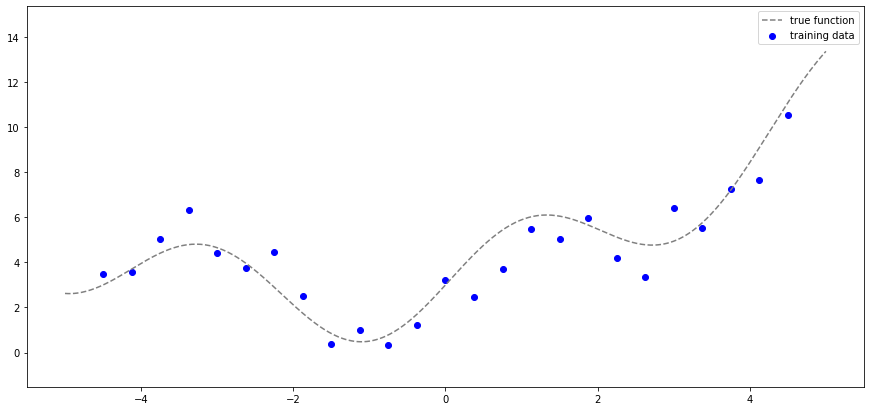

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# set some parameters
K = 3           # number of neighbors
N_TRAIN = 25    # number of training examples
NOISE_STD = 1.0 # standard deviation for Gaussian noise

# toy function
def toy_fcn(x, sigma=NOISE_STD, seed=42):
    return 3 + 0.7*x + 0.2*x**2 + 2*np.sin(1.5*x) + np.random.RandomState(seed).normal(0, sigma, x.shape)

# draw a lot of samples from the true function
X_true = np.expand_dims(np.linspace(-5,5,500),1)
y_true = toy_fcn(X_true, sigma=0)

# but we only obtain some noisy observations from the function (the training data):
X_train = np.expand_dims(np.linspace(-4.5, 4.5, N_TRAIN),1)
y_train = toy_fcn(X_train)

# plot true function and training data
plt.figure(figsize=(15,7))
plt.plot(X_true, y_true, label="true function", linestyle="--", color="gray")
plt.scatter(X_train, y_train, label="training data", color="blue")
plt.ylim(np.min(y_true)-2, np.max(y_true)+2)
_=plt.legend()

In the plot you can see the function $f(x)= 3 + 0.7x + 0.2x^2 + 2sin(1.5x)+ \epsilon$ (where $\epsilon$ is normally distributed noise) as grey dashed line.

From this function, we obtained a set of 25 noisy observations (blue dots), i.e. pairs of x- and y-values.
We call these observations our *training data* or *training set*.

Now, one could ask:

*"Given our training data of x-y-pairs, what is a good prediction $\hat{y}$ for $x=2.1$?"*

One straightforward idea is to look at the x-values from the training data that are "close" to $x=2.1$ and average the corresponding y-values. This is the main idea of KNN.


We are now going to implement KNN regression in two steps. The first step is to find the nearest neighbors.
#### b) Complete the function ``get_neighbors_idx()`` in the module ``KNearestNeighborsRegression``.
The function computes the Euclidean distance between the vector $\mathbf{v} \in \mathbb{R}^{1 \times D}$ and each row vector in the matrix $\mathbf{M} \in \mathbb{R}^{N \times D}$.
It returns the row index of the points in $\mathbf{M}$ with the smallest distances (HINT: the numpy function ``argsort`` might be helpful).

Run the cell below to check your implementation. Choose different values for $x$ and $K$ to visually confirm that your implementation is correct.

In [18]:
import numpy as np

v = np.array([7,8,9])

M = np.array([[1, 2, 3], [4, 5, 6]])


dimentions = M.shape
number_of_vectors = dimentions[0]
distances = []

for e in range(number_of_vectors):
    x = np.linalg.norm((M[e]-v))
    distances.append(x)
    
    pass
newOrder = np.argsort(distances)



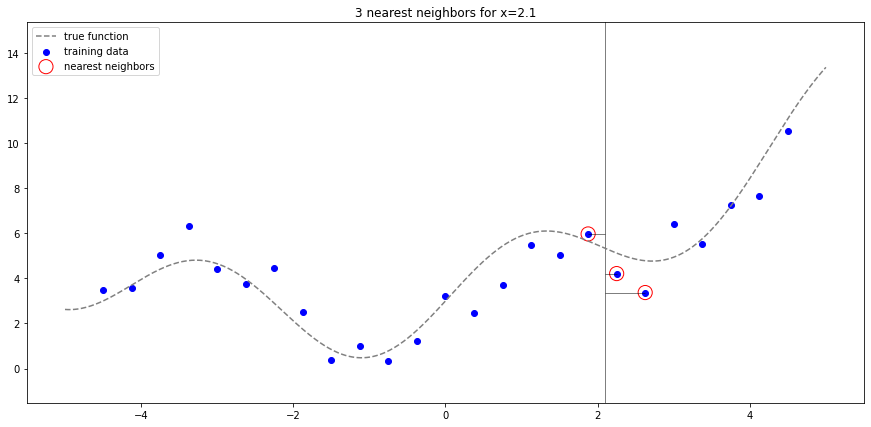

In [19]:
import KNearestNeighborsRegression as knn
x = np.array([[2.1]])
idx = knn.get_neighbors_idx(x, X_train, K)
plt.figure(figsize=(15,7))
plt.plot(X_true, y_true, label="true function", linestyle="--", color="gray")
plt.scatter(X_train, y_train, label="training data", color="blue")
plt.scatter(X_train[idx], y_train[idx], s=200, facecolors='none', edgecolors='red', label="nearest neighbors")
plt.vlines(x, -5, 20, linewidth=0.5)
plt.ylim(np.min(y_true)-2,np.max(y_true)+2)
plt.hlines(y_train[idx], X_train[idx], x, linewidth=0.5)
plt.title(f"{K} nearest neighbors for x={x[0,0]}")
_=plt.legend()

expected output:

<img src="images/NearestNeighbors.jpeg"/>

Now that we have a function that finds us the nearest neighbors, we can make predictions for new, unseen data (the *test data*) by averaging the corresponding y-values.
#### c) Complete the function ``knn_regressor()`` in the module ``KNearestNeighborsRegression``.
The function takes the following inputs: ``X_test, X_train, y_train, n_neighbors``. For each example in ``X_test`` it finds the closest neighbors in ``X_train`` and returns the prediction for each example in ``y_predict``.

#### d) Complete the function ``compute_rmse()`` in the module ``my_utils``.
The function computes the root mean squared error (RMSE) between the actual and the predicted values. We will use the RMSE to measure the accuracy of our predictions.
#### e) Complete the code in the cell below.
Make predictions for the new data points using ``knn_regressor()``, store them in ``y_pred``, and compute the RMSE for your predictions using ``compute_rmse()``. Run the cell below to visualize the results and to check the correct implementation of both functions.

In [20]:
import my_utils as utl
N_TEST = 25
X_test = np.expand_dims(np.linspace(-4.5, 4.5, N_TEST),1)
y_test = toy_fcn(X_test)

# ----------------- Add code here ----------------------
y_pred = knn.knn_regressor(X_test, X_train, y_train, K)
RMSE = utl.compute_rmse(y_test, y_pred)
#-------------------------------------------------------

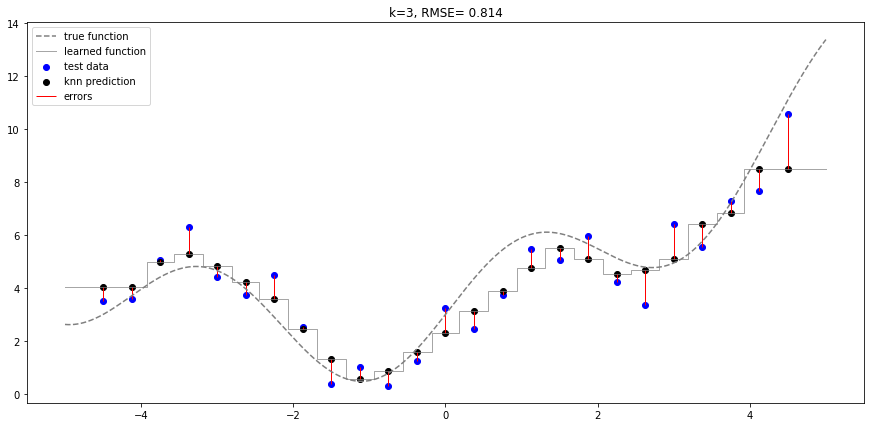

In [21]:
plt.figure(figsize=(15,7))
plt.plot(X_true, y_true, label="true function", linestyle="--", color="gray")
plt.scatter(X_test, y_test, label="test data", color="blue" )
plt.scatter(X_test, y_pred, color="black", label="knn prediction")
plt.vlines(X_test, y_test, y_pred, linewidth=1.0, label="errors", color="red")
plt.step(np.linspace(-5,5,500), knn.knn_regressor(np.expand_dims(np.linspace(-5,5,500),1), X_train, y_train, K), where="mid", linewidth=1.0, color="gray", alpha=0.7, label="learned function")
plt.title(f"k={K}, RMSE={RMSE: .3f}")
_=plt.legend()

expected output:

<img src="images/predictions.jpeg"/>

#### f) In the first cell of the notebook, change 
- the number of neighbors ``K`` and observe how that changes your predictions and the RMSE. What seems to be a reasonable choice for $K$?
- the the number of traning points ``N_TRAIN``. What to you obersve? Does this change our reasonable choice for $K$?
- the noise level ``NOISE_STD``. What to you obersve? Does this change our reasonable choice for $K$?

Congratulations, you just succesfully implemtented your first machine learning algorithm!

Now open the notebook ``Exercise_02_CCPowerPlant`` to apply it to a real world problem.